In [1]:
# Import pandas and numpy libraries

import pandas as pd
import numpy as np

In [2]:
# Read train data from csv file

train_df = pd.read_csv('Ames_train.csv')
train_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
1,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
2,534178010,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,COD,Normal,127000
3,905452160,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,128000
4,535376100,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480


In [3]:
# For the example codes, I will only use 
# 4 variables and the target price
train_df = train_df[['Gr Liv Area',
                     'Garage Area',
                     'Year Built',
                     'Garage Finish',
                     'SalePrice']]

train_df.head()

,Gr Liv Area,Garage Area,Year Built,Garage Finish,SalePrice
0,1078,500.0,1971,Fin,149900
1,1475,336.0,1977,RFn,127000
2,1052,311.0,1963,Fin,127000
3,1172,366.0,1954,Fin,128000
4,1073,326.0,1921,Unf,108480


In [4]:
from sklearn.preprocessing import OneHotEncoder

# We define our One Hot Encoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

# We can use here a list of one or more categorical variables to convert into numerical
categorical_features = ['Garage Finish']

# We apply the encoding to our train dataset
feature_arr = ohe.fit_transform(train_df[categorical_features]).toarray()

# We also store the names of the categories for the new column names
feature_labels = ohe.categories_

# We apply the new feature names
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())

# And then combine with the rest of the numerical variables
train_df = pd.concat([train_df, features], axis=1).drop(columns=categorical_features, 
                                                        axis=1)

train_df.head()

,Gr Liv Area,Garage Area,Year Built,SalePrice,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Finish_nan
0,1078,500.0,1971,149900,1.0,0.0,0.0,0.0
1,1475,336.0,1977,127000,0.0,1.0,0.0,0.0
2,1052,311.0,1963,127000,1.0,0.0,0.0,0.0
3,1172,366.0,1954,128000,1.0,0.0,0.0,0.0
4,1073,326.0,1921,108480,0.0,0.0,1.0,0.0


In [5]:
# Now, I'll keep just my 4 variables (they are 7 now after OHE)
# We will use the standard naming of:
# - X for the dataframe including all the input variables
# - y for the target 1-column dataframe

X = train_df.drop(columns=['SalePrice']).fillna(0)             
    
y = train_df[['SalePrice']]

# We print the shape to get a better idea of the number 
# of rows and columns that we got

X.shape, y.shape

((2344, 7), (2344, 1))

In [6]:
# Feature Engineering:

X['Garage_area_ratio'] = X['Garage Area']/X['Gr Liv Area']
X['Total_area'] = X['Garage Area'] + X['Gr Liv Area']

# Engineering more variables by applying non-linear 
# transformations to original variables

for column in ['Gr Liv Area', 
               'Garage Area', 
               'Year Built', 
               'Garage_area_ratio', 
               'Total_area']:
    X[column + '_log'] = np.log(X[column] + 0.0001)
    
X.head()

,Gr Liv Area,Garage Area,Year Built,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Finish_nan,Garage_area_ratio,Total_area,Gr Liv Area_log,Garage Area_log,Year Built_log,Garage_area_ratio_log,Total_area_log
0,1078,500.0,1971,1.0,0.0,0.0,0.0,0.463822,1578.0,6.982863,6.214608,7.586296,-0.768039,7.363914
1,1475,336.0,1977,0.0,1.0,0.0,0.0,0.227797,1811.0,7.296413,5.817111,7.589336,-1.478863,7.501635
2,1052,311.0,1963,1.0,0.0,0.0,0.0,0.295627,1363.0,6.958448,5.739793,7.582229,-1.218317,7.217444
3,1172,366.0,1954,1.0,0.0,0.0,0.0,0.312287,1538.0,7.066467,5.902634,7.577634,-1.163513,7.338238
4,1073,326.0,1921,0.0,0.0,1.0,0.0,0.303821,1399.0,6.978214,5.786898,7.560601,-1.190987,7.243513


In [7]:
from sklearn.model_selection import train_test_split

# As seen before, we need to create a random split for validation
# in this case, we'll use a 30% split.

X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=0.3, 
                                                  random_state=2023)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1640, 14), (704, 14), (1640, 1), (704, 1))

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

result_train_dict = {}
result_val_dict = {}
error_curve_train_dict = {}
error_curve_val_dict = {}

for d in [3,5,7]: # max_tree_depth
    for lr in [0.1, 0.05, 0.01]: # learning rate
        for f in [0.3, 0.5, 0.7]: # % of features (columns)
            for s in [0.5, 0.6, 0.7]: # % of data (rows)
                for ms in [10, 20, 30]: # min_samples for split the tree


                    gb_reg = GradientBoostingRegressor(random_state= 28, 
                                                       n_estimators= 1000,
                                                       validation_fraction= 0.1,
                                                       n_iter_no_change= 20,
                                                       verbose=0,
                                                       max_depth= d,
                                                       learning_rate= lr,
                                                       max_features= f,
                                                       subsample= s,
                                                       min_samples_split= ms)

                    gb_reg.fit(X_train, np.ravel(y_train))

                    train_predicted = gb_reg.predict(X_train)
                    val_predicted = gb_reg.predict(X_val)

                    result_train_dict[d, lr, f, s, ms] = mean_squared_error(
                        np.log(y_train), 
                        np.log(train_predicted), 
                        squared = False)
                    result_val_dict[d, lr, f, s, ms] = mean_squared_error(
                        np.log(y_val), 
                        np.log(val_predicted), 
                        squared = False)
                    
                    error_curve_train_dict[d, lr, f, s, ms] = gb_reg.train_score_

In [9]:
pd.DataFrame.from_dict(result_val_dict, orient='index', columns=['val_rmse']
                      ).sort_values(by='val_rmse', ascending=True)

,val_rmse
"(7, 0.1, 0.7, 0.5, 30)",0.180984
"(7, 0.1, 0.5, 0.7, 30)",0.181238
"(5, 0.1, 0.3, 0.6, 30)",0.181709
"(5, 0.1, 0.7, 0.7, 30)",0.182193
"(7, 0.05, 0.5, 0.5, 30)",0.182437
...,...
"(3, 0.01, 0.5, 0.7, 20)",0.190941
"(3, 0.01, 0.7, 0.5, 10)",0.190961
"(3, 0.05, 0.7, 0.5, 20)",0.191243
"(3, 0.01, 0.7, 0.7, 20)",0.191334


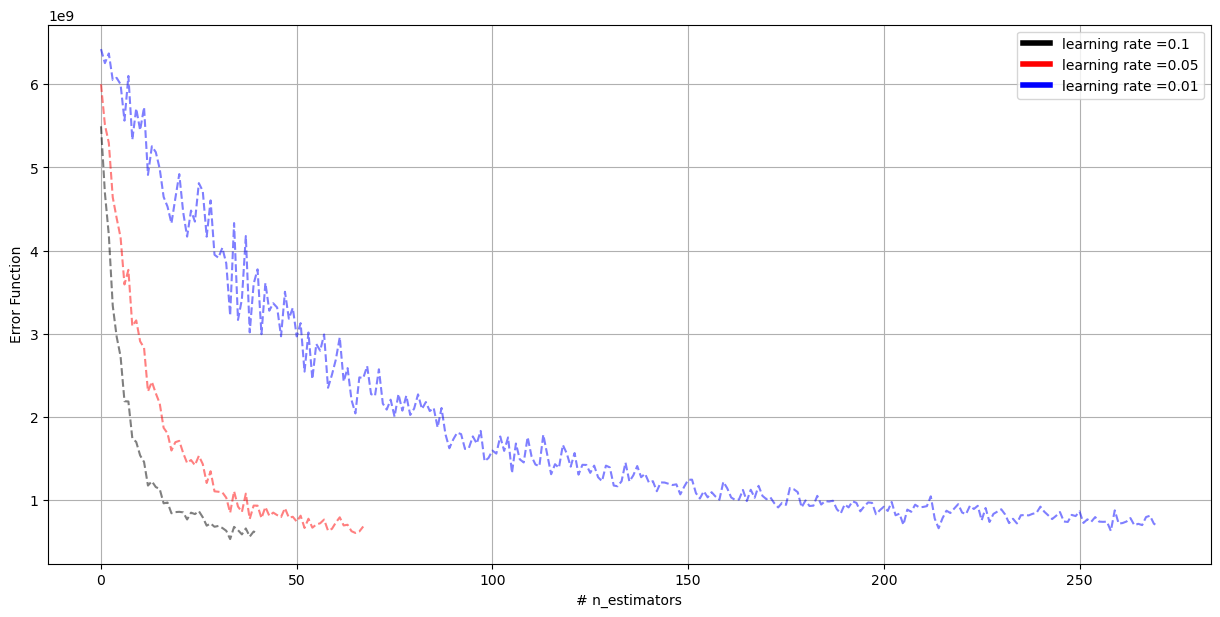

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(15, 7))
colors= ['black', 'red', 'blue']
color_index = 0
custom_lines = np.array([])
custom_names = np.array([])

d = 7
f = 0.7
s = 0.5
ms = 30

for lr in [0.1, 0.05, 0.01]:

    plt.plot(error_curve_train_dict[d, lr, f, s, ms], 
             alpha=0.5, c=colors[color_index], linestyle='--')
    
    color_line = Line2D([0], [0], color=colors[color_index], lw=4)
    custom_lines = np.append(custom_lines,color_line)
    color_name = 'learning rate =' + str(lr)
    custom_names = np.append(custom_names,color_name)
    color_index+=1

ax.grid(True)
plt.xlabel('# n_estimators')
plt.ylabel('Error Function')

ax.legend(custom_lines, custom_names)

plt.show()

In [11]:
pd.DataFrame.from_dict(result_train_dict, orient='index', 
                       columns=['train_rmse']).loc[[(7, 0.1, 0.7, 0.5, 30)]]

,train_rmse
"(7, 0.1, 0.7, 0.5, 30)",0.146181


In [12]:
# Apply the model parameters to the whole train dataset
# getting a similar RMSE that we got for training

best = GradientBoostingRegressor(random_state= 28, 
                                 n_estimators= 1000,
                                 validation_fraction= 0.1,
                                 n_iter_no_change= 20,
                                 verbose=0,
                                 max_depth= 7,
                                 learning_rate= 0.1,
                                 max_features= 0.7,
                                 subsample= 0.5,
                                 min_samples_split= 30)

best.fit(X.fillna(0), np.ravel(y))

train_predicted = best.predict(X.fillna(0))

mean_squared_error(np.log(y), np.log(train_predicted), squared = False)

0.14753486414192057

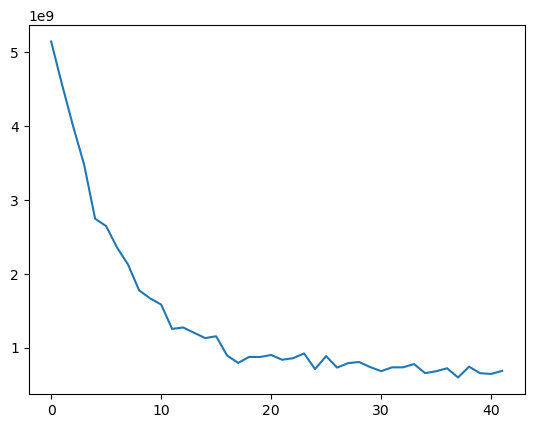

In [13]:
plt.plot(best.train_score_)

In [15]:
# Read the test csv file, and repeat the process:

test_df = pd.read_csv('Ames_test.csv')
test_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
2,527358200,85,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,WD,Family,170000
3,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
4,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


In [16]:
# Keep the same variables, apply the same transformations

test_df = test_df[['Gr Liv Area',
                   'Garage Area',
                   'Year Built',
                   'Garage Finish',
                   'SalePrice']]

In [17]:
# Careful! For the test set, we just APPLY the One Hote Encoder
# So we only use "transform", not "fit" and "transform".

categorical_features = ['Garage Finish']

feature_arr = ohe.transform(test_df[categorical_features]).toarray()
feature_labels = ohe.categories_

features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())
test_df = pd.concat([test_df, features], axis=1).drop(columns=categorical_features, 
                                                      axis=1)

test_df.head()

,Gr Liv Area,Garage Area,Year Built,SalePrice,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Finish_nan
0,896,730.0,1961,105000,0.0,0.0,1.0,0.0
1,2110,522.0,1968,244000,1.0,0.0,0.0,0.0
2,1173,528.0,1974,170000,0.0,1.0,0.0,0.0
3,1674,663.0,2000,216000,0.0,1.0,0.0,0.0
4,864,0.0,1971,115000,0.0,0.0,0.0,1.0


In [18]:
X_test= test_df.drop(columns=['SalePrice']).fillna(0)

# Feature Engineering:

X_test['Garage_area_ratio'] = X_test['Garage Area']/X_test['Gr Liv Area']
X_test['Total_area'] = X_test['Garage Area'] + X_test['Gr Liv Area']

# Engineering more variables by applying non-linear 
# transformations to original variables

for column in ['Gr Liv Area', 
               'Garage Area', 
               'Year Built', 
               'Garage_area_ratio', 
               'Total_area']:
    X_test[column + '_log'] = np.log(X_test[column] + 0.0001)

y_test = test_df[['SalePrice']].copy()

In [19]:
# Apply the already previously trained tree to our test dataset:

y_test['SalePrice_predicted'] = best.predict(X_test.fillna(0))
y_test.head()

,SalePrice,SalePrice_predicted
0,105000,130114.878439
1,244000,212855.534934
2,170000,156269.237686
3,216000,221305.148916
4,115000,100891.956453


In [20]:
# What error are we getting for the test set?

print(mean_squared_error(np.log(y_test['SalePrice']), 
                         np.log(y_test['SalePrice_predicted']), 
                         squared = False))

0.2225391760137178


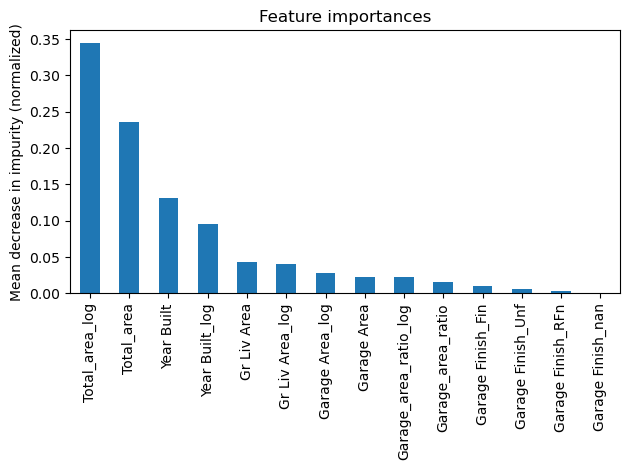

In [21]:
feat_importance = best.feature_importances_
tree_importances = pd.Series(feat_importance, index=X_test.columns).sort_values(ascending=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity (normalized)")
fig.tight_layout()